# Trabalho de Ciência dos Dados


** Nome:** Abel Cavalcante de Andrade Neto

## Introdução

Visando compreender a interação do IDH com fatores como o nível de fertilidade e o número de idosos de um país, foi feito o questionamento:
*Como o nível de fertilidade e a porcentagem de idosos se relacionam com o IDH de um país?*

## Análises e explicação dos resultados

### Importações e leituras

O programa importa as bibliotecas necessárias para essa análise, além de ler os arquivos em questão:

In [17]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

idh = pd.read_excel('Indicator_HDI.xlsx')
fertility = pd.read_excel('indicator undata total_fertility.xlsx')
seniors = pd.read_excel('population_aged_60plus_years_both_sexes_percent.xlsx')

### Filtrando o Ano

Devido à limitações dos próprios dados, o ano escolhido foi o de 2005:

In [18]:
idh_5 = idh.loc[:, ["HDI", 2005]]
fert_5 = fertility.loc[:, ["Total fertility rate", 2005]]
seni_5 = seniors.loc[:, ["geo", 2005]]

### Conversão de Índice

Aqui, definimos o que servirá como índice em cada uma das tabelas:

In [19]:
idh_index = idh_5.set_index('HDI')
fert_index = fert_5.set_index('Total fertility rate')
seni_index = seni_5.set_index('geo')

### Remoção dos Países sem dados

Removemos, por meio do comando *.dropna()*, os países que não possuem dados:

In [20]:
idh_nan = idh_index.dropna()
fert_nan = fert_index.dropna()
seni_nan = seni_index.dropna()

### Junção

Assim, juntamos todos os dados em uma única tabela:

In [21]:
idh_fert = idh_nan.join(fert_nan, how="inner", lsuffix="_IDH", rsuffix="_Fertility")
everything = idh_fert.join(seni_nan, how="inner")
everything.columns = ['2005_IDH', '2005_Fertility Rate', '2005_Amount of Elderly (%)']

everything.head()

,2005_IDH,2005_Fertility Rate,2005_Amount of Elderly (%)
Afghanistan,0.340,6.93,3.62
Albania,0.721,1.92,12.30
Algeria,0.667,2.51,7.04
Angola,0.445,6.66,3.71
Argentina,0.765,2.29,13.80


E ordenamos baseando-se no IDH:

In [22]:
everything.sort_values('2005_IDH', inplace = True)

everything.head()

,2005_IDH,2005_Fertility Rate,2005_Amount of Elderly (%)
"Congo, Dem. Rep.",0.260,6.73,4.73
Niger,0.265,7.62,4.06
Burundi,0.267,6.73,4.21
Mozambique,0.285,5.67,4.83
Liberia,0.300,5.46,4.90


## Gráficos

Assim, podemos representar esses dados por meio de gráficos, para facilitar a visualização:

Começando com a Quantidade de Idosos:

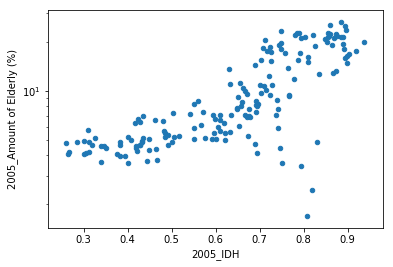

In [23]:
everything.plot.scatter(x='2005_IDH',y='2005_Amount of Elderly (%)', logy=True)

Fazemos a correlação:

In [25]:
everything['2005_IDH'].corr(everything['2005_Amount of Elderly (%)'])

0.7483393477685291

E adicionamos uma reta ao gráfico

In [49]:
def reta_am(dados_x, dados_y):    
    a = dados_y.cov(dados_x) / dados_x.var()
    b = dados_y.mean() - a*dados_x.mean()
    
    fig = plt.figure(figsize=(8, 6))
    plt.scatter(dados_x, dados_y, c='blue', alpha=0.8)
    plt.title('IDH vesrsus Amount of Elderly (2005)')
    plt.xlabel('IDH')
    plt.ylabel('Amount of Elderly (%)')
    
    plt.plot((dados_x.min(), dados_x.max()), (a*dados_x.min()+b, a*dados_x.max()+b), color='red')
 
    plt.tight_layout()
    plt.show()
    
    print('Coeficiente linear:', b)
    print('Coeficiente angular:', a)

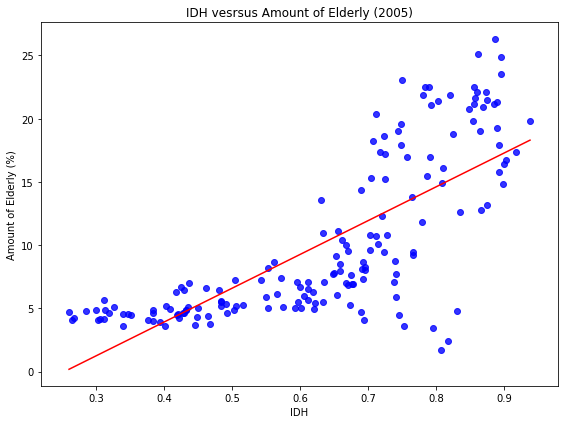

Coeficiente linear: -6.76333389305708
Coeficiente angular: 26.724546035656715


In [50]:
reta_am(everything['2005_IDH'], everything['2005_Amount of Elderly (%)'])

Repetindo, assim, o mesmo processo para os dados de Fertilidade:

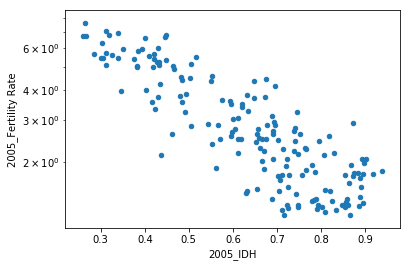

In [41]:
everything.plot.scatter(x='2005_IDH', y='2005_Fertility Rate', logy=True);

In [42]:
everything['2005_IDH'].corr(everything['2005_Fertility Rate'])

-0.8634699642595323

In [53]:
def reta_fer(dados_x, dados_y):    
    a = dados_y.cov(dados_x) / dados_x.var()
    b = dados_y.mean() - a*dados_x.mean()
    
    fig = plt.figure(figsize=(8, 6))
    plt.scatter(dados_x, dados_y, c='blue', alpha=0.8)
    plt.title('IDH vesrsus Fertility (2005)')
    plt.xlabel('IDH')
    plt.ylabel('Fertility')
     
    plt.plot((dados_x.min(), dados_x.max()), (a*dados_x.min()+b, a*dados_x.max()+b), color='red')
 
    plt.tight_layout()
    plt.show()
    
    print('Coeficiente linear:', b)
    print('Coeficiente angular:', a)

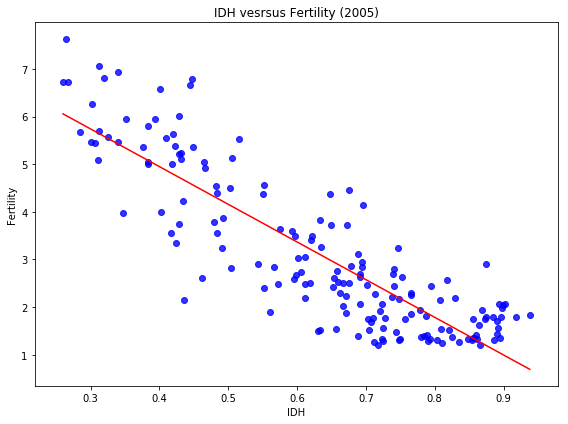

Coeficiente linear: 8.112727128619099
Coeficiente angular: -7.90895983867094


In [54]:
reta_fer(everything['2005_IDH'], everything['2005_Fertility Rate'])

## Conclusão

Com esses dados, foi possível observar uma clara relação entre o IDH e os parâmetros observados: A Fertilidade possui uma relação inversda clara quanto ao IDH, sendo que quanto maior o IDH, maior o nível de fertilidade, mas por quê?

## Expandindo a observação

Nós vimos como esses dados se relacionam no ano de 2005, mas será que isso perdura em outros anos?